In [1]:
import gzip
import pandas as pd
from collections import defaultdict
import numpy as np
import re

## Import all the json data into dataframe

In [2]:
def parse(path):
   g = gzip.open(path, 'rb')
   for l in g:
     yield eval(l)
    
#getDF but spererate helpful field into outOf and nHelpful two fields
def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        a = d['helpful']
        d.update(a) #spererate helpful field into outOf and nHelpful two fields
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

In [3]:
#read raw data into dataframe without outOf = 0
path_train = '/Users/xiasong/Documents/Class_2016/DSE/DSE220/homework/Final/train.json.gz'
path_test = '/Users/xiasong/Documents/Class_2016/DSE/DSE220/homework/Final/test_Helpful.json.gz'
df_raw = getDF(path_train)
test_df_raw = getDF(path_test)

In [4]:
df_raw.shape, test_df_raw.shape

((200000, 14), (14000, 13))

In [5]:
df_raw.head(1)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,helpful,outOf,nHelpful,price
0,0,"[[Clothing, Shoes & Jewelry, Women], [Clothing...",I655355328,U745881038,3.0,"These are cute, but they are a little small. ...",R115160670,"05 20, 2014",Cute,1400544000,"{'outOf': 0, 'nHelpful': 0}",0,0,NaN


## Data Mining

[0.68492, 0.03989, 0.27519]


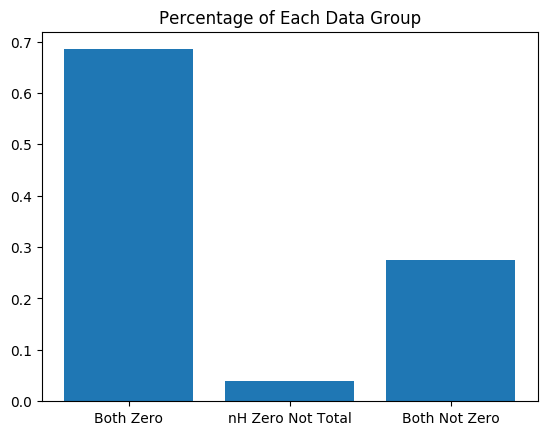

In [6]:
import numpy as np
import matplotlib.pyplot as plt; plt.rcdefaults()
from pylab import *
#1.Both outof and nhelpful are zeros
zz = df_raw.loc[(df_raw.outOf == 0) & (df_raw.nHelpful == 0)]
zz = zz.reset_index(drop=True)
#2.Outof nonzero but nhelpful is zero
nz = df_raw.loc[(df_raw.outOf != 0) & (df_raw.nHelpful == 0)]
nz = nz.reset_index(drop=True)
#3.Both outof and nhelpful are nonzero
nn = df_raw.loc[df_raw.nHelpful != 0]
nn = nn.reset_index(drop=True)

#percentage of each category 
total = len(zz) + len(nz) + len(nn)
Pzz = len(zz)/total
Pnz = len(nz)/total
Pnn = len(nn)/total
percentage = [Pzz, Pnz, Pnn]
print (percentage)
n = 3
ind = np.arange(n)

#bar plot for three data sets
#objects = ('Both Zero', 'nH Zero Not Total', 'Both Not Zero')
figure(1)
bar(ind,percentage, align='center')
xticks(ind,  ('Both Zero', 'nH Zero Not Total', 'Both Not Zero'))
#xlabel('Data Groups')
#ylabel('Percentage')
title('Percentage of Each Data Group')
plt.show()

### Helpratio: positive number of helpful vote to total number of vote

In [7]:
#cleaning train data and remove votes less than 1
df = df_raw[df_raw.outOf > 0]
df = df.reset_index(drop=True)

In [8]:
def polyfit(x,y,degree):
    results = {}
    coeffs = np.polyfit(x,y,degree)
    results['polynomial'] = coeffs.tolist()
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar) **2)
    sstot = np.sum((y-ybar)**2)
    results['determination'] = ssreg / sstot
    return results

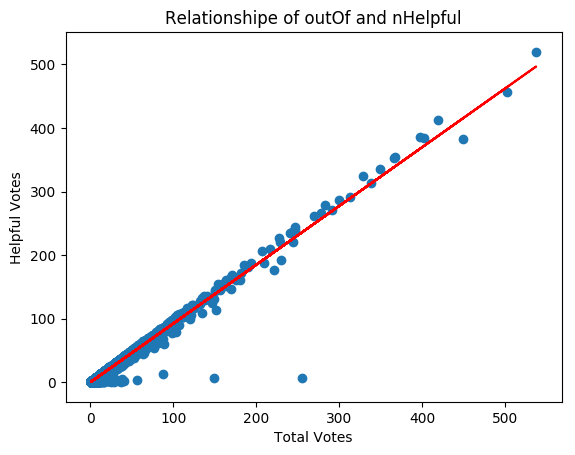

{'polynomial': [0.9257433555107532, -0.30651671051744034], 'determination': 0.97546901144804632}


In [9]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color = 'red')
ax.scatter(x,y)
ax.set_title('Relationshipe of outOf and nHelpful')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x,y,1))

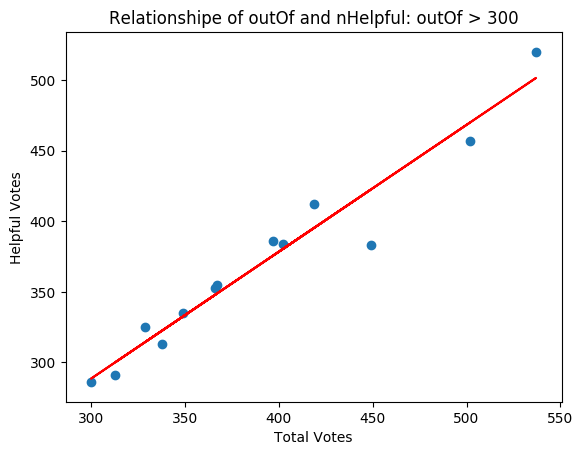

{'polynomial': [0.8980703280318085, 19.121505964214737], 'determination': 0.94643527391630267}


13

In [191]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z1 = z.loc[(z.outOf >= 300)]
x1 = z1['outOf']
y1 = z1['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x1,y1,deg=1)
ax.plot(x1, fit[0] * x1 + fit[1], color = 'red')
ax.scatter(x1,y1)
ax.set_title('Relationshipe of outOf and nHelpful: outOf > 300')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x1,y1,1))
len(x1)

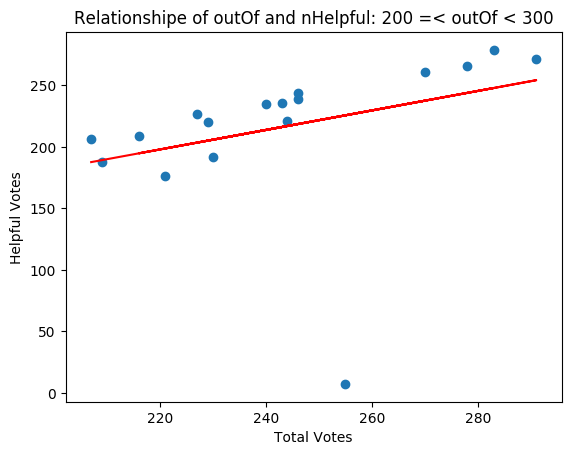

{'polynomial': [0.7928043522890578, 23.456117840279127], 'determination': 0.10708682082729164}
17


In [186]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z2 = z.loc[(z.outOf >= 200) & (z.outOf < 300)]
x2 = z2['outOf']
y2 = z2['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x2,y2,deg=1)
ax.plot(x2, fit[0] * x2 + fit[1], color = 'red')
ax.scatter(x2,y2)
ax.set_title('Relationshipe of outOf and nHelpful: 200 =< outOf < 300')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x2,y2,1))
print (len(x2))

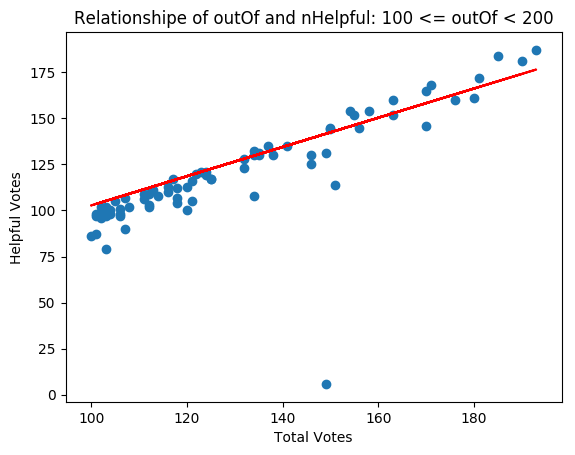

{'polynomial': [0.8969814588531674, 3.6392536991589814], 'determination': 0.64326236876489229}
74


In [187]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z3 = z.loc[(z.outOf >= 100) & (z.outOf < 200)]
x3 = z3['outOf']
y3 = z3['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x2,y2,deg=1)
ax.plot(x3, fit[0] * x3 + fit[1], color = 'red')
ax.scatter(x3,y3)
ax.set_title('Relationshipe of outOf and nHelpful: 100 <= outOf < 200')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x3,y3,1))
print (len(x3))

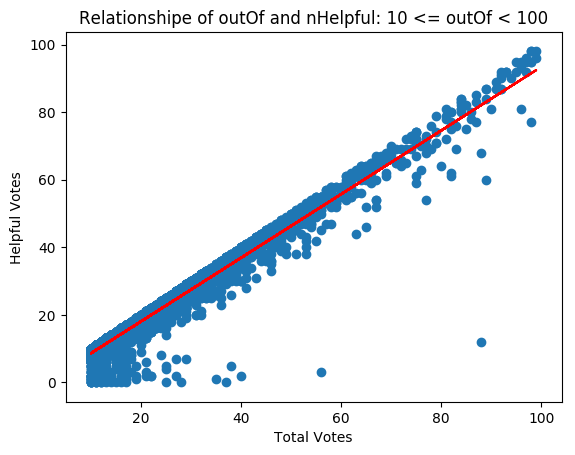

{'polynomial': [0.9415368468010219, -0.7497957975852848], 'determination': 0.95591912227123366}
5212


In [192]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z4 = z.loc[(z.outOf >= 10) & (z.outOf < 100)]
x4 = z4['outOf']
y4 = z4['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x4,y4,deg=1)
ax.plot(x4, fit[0] * x4 + fit[1], color = 'red')
ax.scatter(x4,y4)
ax.set_title('Relationshipe of outOf and nHelpful: 10 <= outOf < 100')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x4,y4,1))
print (len(x4))

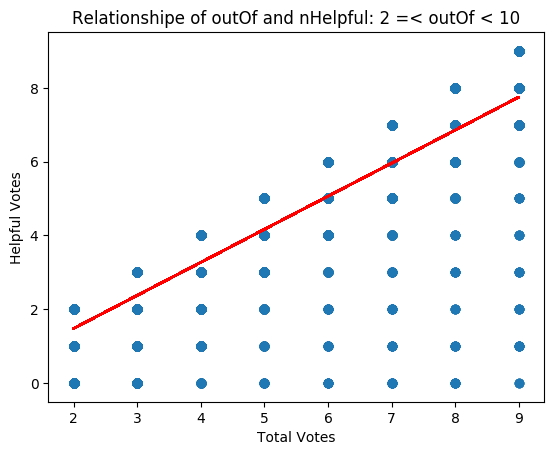

{'polynomial': [0.8960742322977114, -0.3162614164321955], 'determination': 0.78248301349708316}
29149


In [194]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z5 = z.loc[(z.outOf >= 2) & (z.outOf < 10)]
x5 = z5['outOf']
y5 = z5['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x5,y5,deg=1)
ax.plot(x5, fit[0] * x5 + fit[1], color = 'red')
ax.scatter(x5,y5)
ax.set_title('Relationshipe of outOf and nHelpful: 2 =< outOf < 10')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x5,y5,1))
print (len(x5))

/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:11: RankWarning: Polyfit may be poorly conditioned


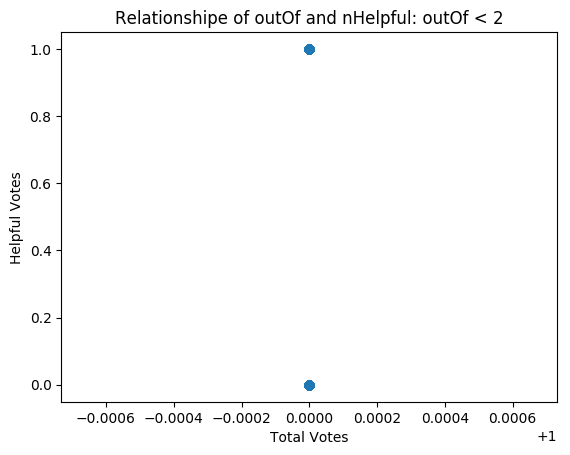

{'polynomial': [0.3789534517179965, 0.3789534517179812], 'determination': 2.4250985570140646e-27}
28551


/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RankWarning: Polyfit may be poorly conditioned
  app.launch_new_instance()


In [195]:
#relationship between total votes and helpful votes
import matplotlib.pyplot as plt
import numpy as np
x = df['outOf']
y = df['nHelpful']
z = pd.concat([x,y], axis = 1)
z7 = z.loc[(z.outOf < 2)]
x7 = z7['outOf']
y7 = z7['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x7,y7,deg=1)
ax.plot(x7, fit[0] * x7 + fit[1], color = 'red')
ax.scatter(x7,y7)
ax.set_title('Relationshipe of outOf and nHelpful: outOf < 2')
ax.set_xlabel("Total Votes")
ax.set_ylabel("Helpful Votes")
plt.show()
print (polyfit(x7,y7,1))
print (len(x7))

In [17]:
#calculate helpratio, positive number of helpful vote to total number of vote
a = df['outOf']
b = len(a)
c = df['nHelpful']
Helpratio = []
for i in range(b):
    d = c[i]/a[i]
    Helpratio.append(d)

In [18]:
df['Helpratio'] = Helpratio

In [19]:
ratio_df = df.loc[df.Helpratio >= 0.15]
ratio_df = ratio_df.reset_index(drop = True)

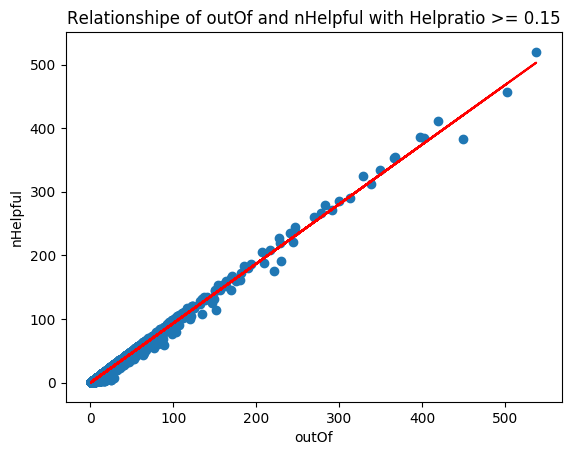

{'polynomial': [0.93685589886361, -0.2138830985714079], 'determination': 0.99121266289340604}


In [20]:
x = ratio_df['outOf']
y = ratio_df['nHelpful']
fig, ax = plt.subplots()
fit = np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color = 'red')
ax.scatter(x,y)
ax.set_title('Relationshipe of outOf and nHelpful with Helpratio >= 0.15')
ax.set_xlabel("outOf")
ax.set_ylabel("nHelpful")
plt.show()
print (polyfit(x,y,1))

In [21]:
ratio_df1 = df.loc[df.Helpratio < 0.15]
ratio_df1 = ratio_df.reset_index(drop = True)
#ratio_df1 = ratio_df1.reset_index(drop=True)

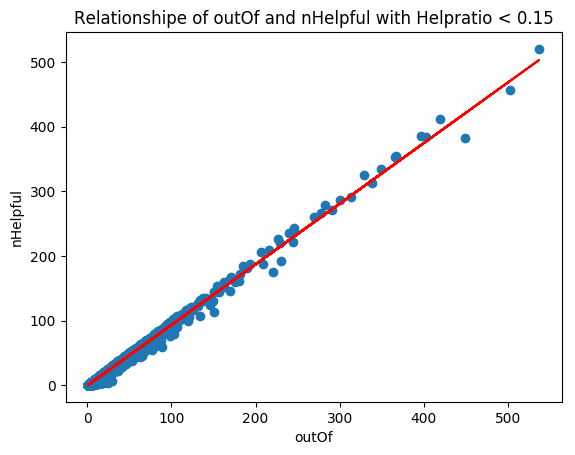

{'polynomial': [0.93685589886361, -0.2138830985714079], 'determination': 0.99121266289340604}


In [22]:
x = ratio_df1['outOf']
y = ratio_df1['nHelpful']
fig, ax = plt.subplots()
ax.scatter(x,y)
fit = np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color = 'red')
ax.set_title('Relationshipe of outOf and nHelpful with Helpratio < 0.15')
ax.set_xlabel("outOf")
ax.set_ylabel("nHelpful")
plt.show()
print (polyfit(x,y,1))

In [23]:
filter_df = df.drop(df[(df.Helpratio < 0.15) & (df.outOf > 80)].index)
filter_df = filter_df.reset_index(drop=True)

In [24]:
ratio_df1 = filter_df.loc[filter_df.Helpratio < 0.15]
ratio_df1 = ratio_df1.reset_index(drop=True)

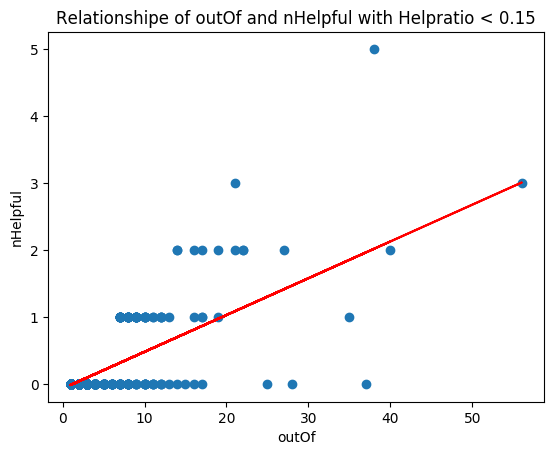

{'polynomial': [0.054927454631076615, -0.06329023559253612], 'determination': 0.51106878348226137}


In [25]:
x = ratio_df1['outOf']
y = ratio_df1['nHelpful']
fig, ax = plt.subplots()
ax.scatter(x,y)
fit = np.polyfit(x,y,deg=1)
ax.plot(x, fit[0] * x + fit[1], color = 'red')
ax.set_title('Relationshipe of outOf and nHelpful with Helpratio < 0.15')
ax.set_xlabel("outOf")
ax.set_ylabel("nHelpful")
plt.show()
print (polyfit(x,y,1))

# Classify data into two groups: 1 Helpratio >= 0.15; 0 Helpratio < 0.15

In [26]:
a = len(filter_df['outOf'])
b = filter_df['Helpratio']
c = []
for i in range(a):
    if b[i] >= 0.15:
        c.append(1)
    else:
        c.append(0)
filter_df['Helpgroup'] = c

In [27]:
a = len(filter_df['outOf'])
b = filter_df['Helpratio']
c = []
for i in range(a):
    if b[i] >= 0.15:
        c.append(1)
    else:
        c.append(0)
filter_df['Helpgroup'] = c

In [28]:
j = 0
for i in c:
    if i == 0:
        j += 1
j

8044

## Extract related features from original data

### Delay time from the first same product review

##### Train data

In [29]:
#computations for the unixreviewtime of the first time review for a specific product 
time_dict = {}
count_dict = {}
for i in range(len(filter_df)):
    pid = filter_df['itemID'][i]
    tim = filter_df['unixReviewTime'][i]
    if pid in time_dict:
        count_dict[pid] = count_dict[pid] + 1
        if tim < time_dict[pid]:
            time_dict[pid] = tim
    else:
        count_dict[pid] = 1
        time_dict[pid] = tim

In [30]:
# substract the first reviews unixReviewTime for the corresponding reviews
a = np.zeros((1, len(filter_df)))
for i in range(len(filter_df)):
    pid = filter_df['itemID'][i]
    a[0][i] = filter_df['unixReviewTime'][i] - time_dict[pid]

In [31]:
filter_df.unixReviewTime = a.transpose()

##### Test data

In [32]:
#computations for the unixreviewtime of the first time review for a specific product 
time_dict = {}
count_dict = {}
for i in range(len(test_df_raw)):
    pid = test_df_raw['itemID'][i]
    tim = test_df_raw['unixReviewTime'][i]
    if pid in time_dict:
        count_dict[pid] = count_dict[pid] + 1
        if tim < time_dict[pid]:
            time_dict[pid] = tim
    else:
        count_dict[pid] = 1
        time_dict[pid] = tim

In [33]:
# substract the first reviews unixReviewTime for the corresponding reviews
a = np.zeros((1, len(test_df_raw)))
for i in range(len(test_df_raw)):
    pid = test_df_raw['itemID'][i]
    a[0][i] = test_df_raw['unixReviewTime'][i] - time_dict[pid]

In [34]:
test_df_raw.unixReviewTime = a.transpose()

### Rating score deviation from mean

##### Train data

In [35]:
ratingmean = filter_df['rating'].groupby(filter_df['itemID']).transform('mean')

In [36]:
ratDevmean = filter_df['rating'] - ratingmean

In [37]:
filter_df['ratDevmean'] = ratDevmean

In [38]:
filter_df['ratDevmean_ab'] = filter_df['ratDevmean'].abs()

##### Test data

In [39]:
ratingmean = test_df_raw['rating'].groupby(test_df_raw['itemID']).transform('mean')

In [40]:
ratDevmean = test_df_raw['rating'] - ratingmean

In [41]:
test_df_raw['ratDevmean'] = ratDevmean

In [42]:
test_df_raw['ratDevmean_ab'] = test_df_raw['ratDevmean'].abs()

### Number of words of each reveiw text

##### Train data

In [43]:
#extract number of words of each review text
reviewWords = []
for i in filter_df['reviewText']:
    a = i.split()
    b = len(a)
    reviewWords.append(b)

In [44]:
filter_df['reviewWords'] = reviewWords

##### Test data

In [45]:
#extract number of words of each review text
reviewWords = []
for i in test_df_raw['reviewText']:
    a = i.split()
    b = len(a)
    reviewWords.append(b)

In [46]:
test_df_raw['reviewWords'] = reviewWords

### Number of words of each summary text (review length)

##### Train data

In [47]:
#extract number of words of each summary text
summaryWords = []
for i in filter_df['summary']:
    a = i.split()
    b = len(a)
    summaryWords.append(b)

In [48]:
filter_df['summaryWords'] = summaryWords

##### Test data

In [49]:
#extract number of words of each summary text
summaryWords = []
for i in test_df_raw['summary']:
    a = i.split()
    b = len(a)
    summaryWords.append(b)

In [50]:
test_df_raw['summaryWords'] = summaryWords

### Ratio of summary words to review text words

##### Train data

In [51]:
filter_df['ratiosuWords'] = filter_df['summaryWords']/filter_df['reviewWords']

##### Test data

In [52]:
test_df_raw['ratiosuWords'] = test_df_raw['summaryWords']/test_df_raw['reviewWords']

### Number of sentences of each reveiw text

##### Train data

In [53]:
#extract number of sentences of each review text
reviewSentences = []
for i in filter_df['reviewText']:
    j = i.count('.')
    reviewSentences.append(j)

In [54]:
filter_df['reviewSentences'] = reviewSentences

##### Test data

In [55]:
#extract number of sentences of each review text
reviewSentences = []
for i in test_df_raw['reviewText']:
    j = i.count('.')
    reviewSentences.append(j)

In [56]:
test_df_raw['reviewSentences'] = reviewSentences

### Number of characters of each reveiw text

##### Train data

In [57]:
#I found that string.punctuation did not include all the punctuations of brown words, here I added all the extra punctuation in the following list
punctuation = [' ','!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

In [58]:
#extract number of letters of each review text
from collections import Counter
reviewChars = []
for i in filter_df['reviewText']:
    a = dict(Counter(i))
    b = {k:v for k,v in a.items() if k not in punctuation}
    c = sum(list(b.values()))
    reviewChars.append(c)

In [59]:
filter_df['reviewChars'] = reviewChars

##### Test data

In [60]:
#extract number of letters of each review text
reviewChars = []
for i in test_df_raw['reviewText']:
    a = dict(Counter(i))
    b = {k:v for k,v in a.items() if k not in punctuation}
    c = sum(list(b.values()))
    reviewChars.append(c)

In [61]:
test_df_raw['reviewChars'] = reviewChars

### Readability of each review (ARI as indext to measure)

##### Train data

In [62]:
#calculate readability of reveiw text
wordperSen = []
charperWord = []
a = list(filter_df['reviewWords'])
b = list(filter_df['reviewSentences'])
c = list(filter_df['reviewChars'])
for i in range(len(a)):
    if b[i] == 0:
        wordperSen.append(0)
    else:
        j = a[i] / b[i]
        wordperSen.append(j)
for i in range(len(a)):
    if a[i] == 0:
        charperWord.append(0)
    else:
        k = c[i] / a[i]
        charperWord.append(k)

In [63]:
reviewRead = []
for i in range(len(a)):
    ari = 4.71 * charperWord[i] + 0.5 * wordperSen[i] - 21.43
    reviewRead.append(ari)

In [64]:
filter_df['reviewRead'] = reviewRead

##### Test data

In [65]:
#calculate readability of reveiw text
wordperSen = []
charperWord = []
a = test_df_raw['reviewWords']
b = test_df_raw['reviewSentences']
c = test_df_raw['reviewChars']
for i in range(len(a)):
    if b[i] == 0:
        wordperSen.append(0)
    else:
        j = a[i] / b[i]
        wordperSen.append(j)
for i in range(len(a)):
    if a[i] == 0:
        charperWord.append(0)
    else:
        k = c[i] / a[i]
        charperWord.append(k)

In [66]:
reviewRead = []
for i in range(len(a)):
    ari = 4.71 * charperWord[i] + 0.5 * wordperSen[i] - 21.43
    reviewRead.append(ari)

In [67]:
test_df_raw['reviewRead'] = reviewRead

### Number of punctuations of each reveiw text

##### Train data

In [68]:
#I found that string.punctuation did not include all the punctuations of brown words, here I added all the extra punctuation in the following list
punctuation = ['!','"','#','$','%','&',"'",'(',')','*','+',',','-','.','/',':',';','<','=','>','?','@','[','\\',']','^','_','`','{','|','}','~','``',"''",'--']

In [69]:
#extract number of punctuations of each review text
from collections import Counter
reviewPuncts = []
for i in filter_df['reviewText']:
    a = dict(Counter(i))
    b = {k:v for k,v in a.items() if k in punctuation}
    c = sum(list(b.values()))
    reviewPuncts.append(c)

In [70]:
filter_df['reviewPuncts'] = reviewPuncts

##### Test data

In [71]:
#extract number of punctuations of each review text
reviewPuncts = []
for i in test_df_raw['reviewText']:
    a = dict(Counter(i))
    b = {k:v for k,v in a.items() if k in punctuation}
    c = sum(list(b.values()))
    reviewPuncts.append(c)

In [72]:
test_df_raw['reviewPuncts'] = reviewPuncts

### Ratio of punctuations with characters

##### Train data

In [73]:
filter_df['ratiopunChar'] = filter_df['reviewPuncts']/filter_df['reviewChars']

##### Test data

In [74]:
test_df_raw['ratiopunChar'] = test_df_raw['reviewPuncts']/test_df_raw['reviewChars']

### Number of capital words of each review

##### Train data

In [75]:
#extract number of capital words of each summary text
reviewCwords = []
for i in filter_df['reviewText']:
    a = i.split()
    b = [word for word in a if word.isupper()]
    c = len(b)
    reviewCwords.append(c)

In [76]:
filter_df['reviewCwords'] = reviewCwords

In [77]:
filter_df['ratioCwords'] = filter_df['reviewCwords']/filter_df['reviewWords']

##### Test data

In [78]:
#extract number of capital words of each summary text
reviewCwords = []
for i in test_df_raw['reviewText']:
    a = i.split()
    b = [word for word in a if word.isupper()]
    c = len(b)
    reviewCwords.append(c)

In [79]:
test_df_raw['reviewCwords'] = reviewCwords

In [80]:
test_df_raw['ratioCwords'] = test_df_raw['reviewCwords']/test_df_raw['reviewWords']

### Number of capital words of each summary

##### Train data

In [81]:
#extract number of capital words of each summary text
summaryCwords = []
for i in filter_df['summary']:
    a = i.split()
    b = [word for word in a if word.isupper()]
    c = len(b)
    summaryCwords.append(c)

In [82]:
filter_df['summaryCwords'] = summaryCwords

In [83]:
filter_df['suratioCwords'] = filter_df['summaryCwords']/filter_df['summaryWords']

##### Test data

In [84]:
#extract number of capital words of each summary text
summaryCwords = []
for i in test_df_raw['summary']:
    a = i.split()
    b = [word for word in a if word.isupper()]
    c = len(b)
    summaryCwords.append(c)

In [85]:
test_df_raw['summaryCwords'] = summaryCwords

In [86]:
test_df_raw['suratioCwords'] = test_df_raw['summaryCwords']/test_df_raw['summaryWords']

### Number of exclimation and question marks of each review text

##### Train data

In [87]:
#extract number of exclimation and question mark in review text
reexcqueMarks = []
for i in filter_df['reviewText']:
    a = re.findall(r'[!?]',i)
    b = len(a)
    reexcqueMarks.append(b)

In [88]:
filter_df['reexcqueMarks'] = reexcqueMarks

##### Test data

In [89]:
#extract number of exclimation and question mark in review text
reexcqueMarks = []
for i in test_df_raw['reviewText']:
    a = re.findall(r'[!?]',i)
    b = len(a)
    reexcqueMarks.append(b)

In [90]:
test_df_raw['reexcqueMarks'] = reexcqueMarks

### Number of exclimation and question marks of each summary

##### Train data

In [91]:
#extract number of exclimation and question mark in review text
suexcqueMarks = []
for i in filter_df['summary']:
    a = re.findall(r'[!?]',i)
    b = len(a)
    suexcqueMarks.append(b)

In [92]:
filter_df['suexcqueMarks'] = suexcqueMarks

In [93]:
filter_df.shape

(63013, 32)

##### Test data

In [94]:
#extract number of exclimation and question mark in review text
suexcqueMarks = []
for i in test_df_raw['summary']:
    a = re.findall(r'[!?]',i)
    b = len(a)
    suexcqueMarks.append(b)

In [95]:
test_df_raw['suexcqueMarks'] = suexcqueMarks

## Number of reviews of each product (measure the popularity of product)

##### Train data

In [96]:
from collections import Counter
ItemID = list(filter_df['itemID'])
a = len(ItemID)
b = []
counts = dict(Counter(ItemID))
for i in range(a):
    c = ItemID[i]
    d = counts[c]
    b.append(d)

In [97]:
filter_df['numreviewPro'] = b

##### Test data

In [98]:
ItemID = list(test_df_raw['itemID'])
a = len(ItemID)
b = []
counts = dict(Counter(ItemID))
for i in range(a):
    c = ItemID[i]
    d = counts[c]
    b.append(d)

In [99]:
test_df_raw['numreviewPro'] = b

## number of reviews each reviewer (measure reviewer's experience)

##### Train data

In [100]:
ReviewerID = list(filter_df['reviewerID'])
a = len(ReviewerID)
b = []
counts = dict(Counter(ReviewerID))
for i in range(a):
    c = ReviewerID[i]
    d = counts[c]
    b.append(d)

In [101]:
filter_df['numReviews'] = b

##### Test data

In [102]:
ReviewerID = list(test_df_raw['reviewerID'])
a = len(ReviewerID)
b = []
counts = dict(Counter(ReviewerID))
for i in range(a):
    c = ReviewerID[i]
    d = counts[c]
    b.append(d)

In [103]:
test_df_raw['numReviews'] = b

## Data pruning

In [104]:
#remove unnecessary features
filter_dfpru = filter_df.drop(['categoryID', 'categories','itemID','reviewerID','reviewText','reviewHash','reviewTime', 'summary','price', 'nHelpful','helpful'], axis=1)

In [105]:
filter_dfpru.head(1)

,rating,unixReviewTime,outOf,Helpratio,Helpgroup,ratDevmean,ratDevmean_ab,reviewWords,summaryWords,ratiosuWords,...,reviewPuncts,ratiopunChar,reviewCwords,ratioCwords,summaryCwords,suratioCwords,reexcqueMarks,suexcqueMarks,numreviewPro,numReviews
0,3.0,41904000.0,2,1.0,1,-0.428571,0.428571,28,3,0.107143,...,7.0,0.063636,0,0.0,0,0.0,0,0,7,3


In [106]:
for i in filter_dfpru:
    print (i)

rating
unixReviewTime
outOf
Helpratio
Helpgroup
ratDevmean
ratDevmean_ab
reviewWords
summaryWords
ratiosuWords
reviewSentences
reviewChars
reviewRead
reviewPuncts
ratiopunChar
reviewCwords
ratioCwords
summaryCwords
suratioCwords
reexcqueMarks
suexcqueMarks
numreviewPro
numReviews


In [107]:
filter_dfpru.corr()

,rating,unixReviewTime,outOf,Helpratio,Helpgroup,ratDevmean,ratDevmean_ab,reviewWords,summaryWords,ratiosuWords,...,reviewPuncts,ratiopunChar,reviewCwords,ratioCwords,summaryCwords,suratioCwords,reexcqueMarks,suexcqueMarks,numreviewPro,numReviews
rating,1.000000,-0.044461,0.004787,0.178376,0.110524,8.251876e-01,-0.501657,-0.011915,-0.094424,-0.040082,...,-0.006277,0.005463,-0.013938,-0.003281,-0.014532,0.003764,0.082912,0.101173,-1.792685e-02,0.022369
unixReviewTime,-0.044461,1.000000,-0.105571,0.009313,-0.039767,-4.553042e-02,0.136534,0.017974,0.031464,0.018075,...,0.013933,-0.001494,0.008279,-0.003574,0.003890,-0.001387,-0.010769,-0.018409,3.443476e-01,-0.038965
outOf,0.004787,-0.105571,1.000000,0.079916,0.100943,1.648969e-02,0.028052,0.254877,0.071139,-0.087505,...,0.236682,0.009527,0.099873,-0.011376,0.021830,0.008178,0.060595,0.026944,3.783491e-02,0.086891
Helpratio,0.178376,0.009313,0.079916,1.000000,0.868004,1.430415e-01,-0.119315,0.046372,-0.005707,-0.046688,...,0.039898,-0.001928,-0.012070,-0.042740,-0.024715,-0.019882,0.016081,0.023379,1.262177e-02,0.021959
Helpgroup,0.110524,-0.039767,0.100943,0.868004,1.000000,8.465561e-02,-0.062750,0.084260,0.014204,-0.071405,...,0.071478,-0.001599,0.017190,-0.036351,-0.011189,-0.010490,0.029037,0.028877,8.081965e-03,0.037637
ratDevmean,0.825188,-0.045530,0.016490,0.143041,0.084656,1.000000e+00,-0.341038,-0.008737,-0.074294,-0.031910,...,-0.005297,0.002997,-0.006336,0.005233,-0.012203,0.002023,0.068515,0.083014,1.650625e-17,0.020716
ratDevmean_ab,-0.501657,0.136534,0.028052,-0.119315,-0.062750,-3.410380e-01,1.000000,-0.008541,0.027879,0.023162,...,-0.007748,-0.003140,0.006453,0.007636,0.025732,0.018533,-0.001897,-0.009412,1.977673e-01,-0.000793
reviewWords,-0.011915,0.017974,0.254877,0.046372,0.084260,-8.737217e-03,-0.008541,1.000000,0.265194,-0.345211,...,0.844314,-0.019285,0.444650,-0.026581,0.080048,0.018518,0.223193,0.055157,1.895671e-03,0.158572
summaryWords,-0.094424,0.031464,0.071139,-0.005707,0.014204,-7.429443e-02,0.027879,0.265194,1.000000,0.494703,...,0.234323,0.008892,0.125457,-0.014638,0.208041,-0.008994,0.054887,0.006762,1.588829e-03,0.062604
ratiosuWords,-0.040082,0.018075,-0.087505,-0.046688,-0.071405,-3.190981e-02,0.023162,-0.345211,0.494703,1.000000,...,-0.273189,0.036976,-0.171374,0.011715,0.081660,-0.020242,-0.097809,-0.046261,2.790099e-03,-0.084710


In [108]:
#remove unnecessary features
filter_dfpru1 = filter_df.drop(['categoryID', 'categories','itemID','reviewerID','reviewText','reviewHash','reviewTime', 'summary','price', 'nHelpful','helpful','Helpratio','Helpgroup'], axis=1)

In [109]:
#remove unnecessary features
#df_data2 = df_data.drop(['unixReviewTime', 'ratDevmean_ab','ratiosuWords','reviewSentences','suratioCwords', 'reviewRead','numReviews'], axis=1)


In [110]:
#keep necessary features
#filter_dfpru3 = filter_dfpru1[['rating','outOf', 'ratDevmean','reviewWords','ratiosuWords', 'reviewSentences', 'reviewChars', 'reviewPuncts', 'reviewCwords', 'ratioCwords', 'summaryCwords', 'suratioCwords', 'reexcqueMarks','suexcqueMarks', 'numreviewPro', 'numReviews']]


In [111]:
#keep necessary features
filter_dfpru3 = filter_dfpru1[['rating','unixReviewTime','outOf', 'reviewWords','summaryCwords','ratiosuWords','suexcqueMarks', 'numreviewPro','numReviews']]

In [112]:
#keep necessary features
#filter_dfpru3 = filter_dfpru1[['rating','outOf', 'reviewWords','ratiosuWords', 'ratioCwords', 'summaryCwords', 'suexcqueMarks', 'numreviewPro','numReviews']]


In [113]:
filter_dfpru3.head(1)

,rating,unixReviewTime,outOf,reviewWords,summaryCwords,ratiosuWords,suexcqueMarks,numreviewPro,numReviews
0,3.0,41904000.0,2,28,0,0.107143,0,7,3


In [114]:
#keep necessary features
test_df = test_df_raw[['rating','unixReviewTime','outOf', 'reviewWords','summaryCwords','ratiosuWords','suexcqueMarks', 'numreviewPro','numReviews']]

## Data exploratory

In [368]:
Helpratio = list(filter_dfpru['Helpratio'])
Rate = list(filter_dfpru3['rating'])
Time = list(filter_dfpru3['unixReviewTime'])
OutOf = list(filter_dfpru3['outOf'])
reviewWords = list(filter_dfpru3['reviewWords'])
summaryCwords = list(filter_dfpru3['summaryCwords'])
ratiosuWords = list(filter_dfpru3['ratiosuWords'])
suexcqueMarks = list(filter_dfpru3['suexcqueMarks'])
numreviewPro = list(filter_dfpru3['numreviewPro'])
numReviews = list(filter_dfpru3['numReviews'])

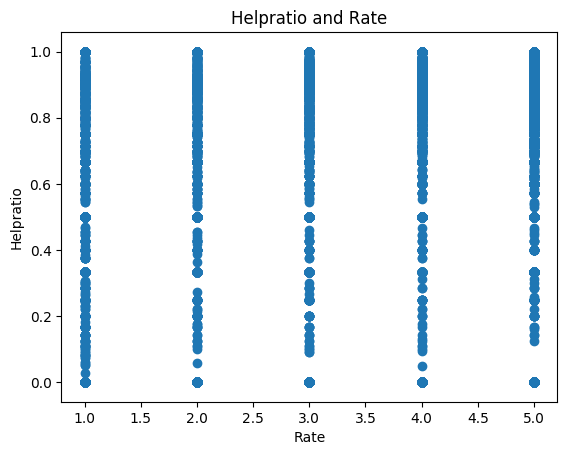

[[ 1.          0.24981571]
 [ 0.24981571  1.        ]]


In [370]:
import matplotlib.pyplot as plt
x = Rate
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and Rate')
ax.set_xlabel('Rate')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

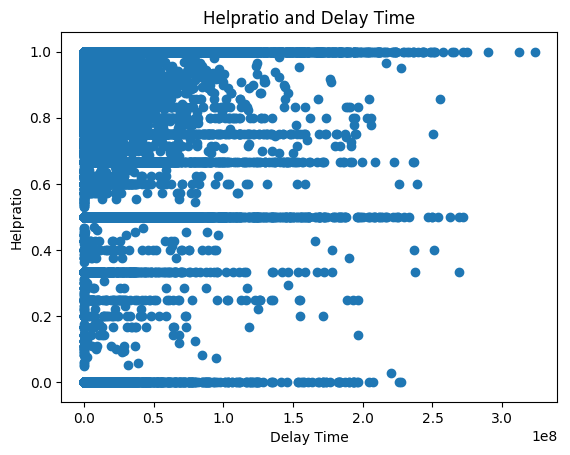

[[ 1.         -0.02818985]
 [-0.02818985  1.        ]]


In [371]:
x = Time
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and Delay Time')
ax.set_xlabel('Delay Time')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

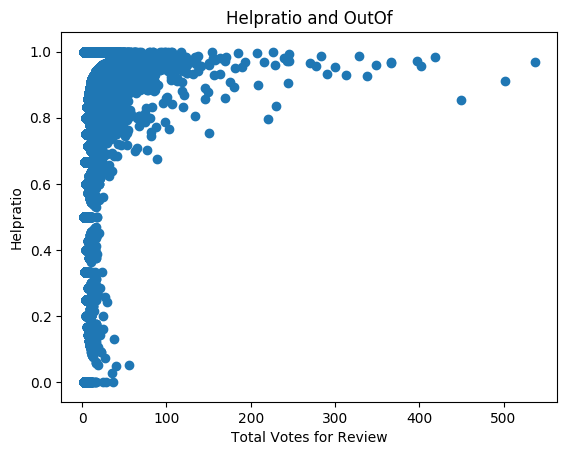

[[ 1.          0.11865756]
 [ 0.11865756  1.        ]]


In [372]:
x = OutOf
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and OutOf')
ax.set_xlabel('Total Votes for Review')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

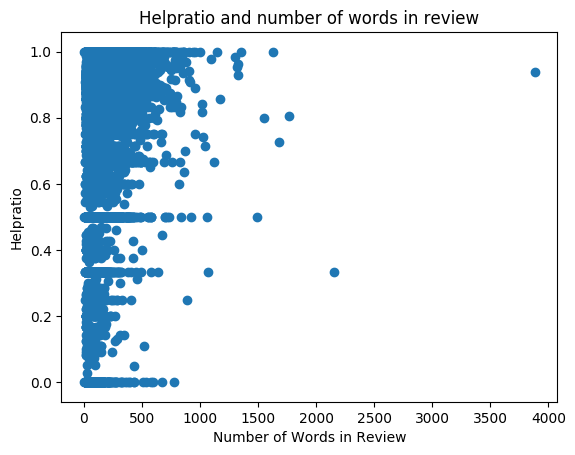

[[ 1.          0.04613624]
 [ 0.04613624  1.        ]]


In [373]:
x = reviewWords
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and number of words in review')
ax.set_xlabel('Number of Words in Review')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

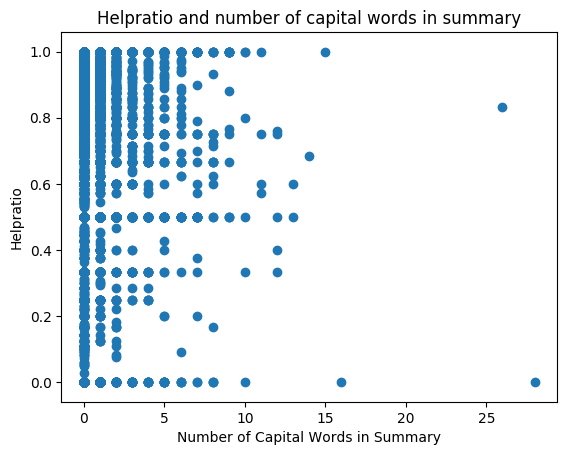

[[ 1.         -0.03675297]
 [-0.03675297  1.        ]]


In [374]:
x = summaryCwords
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and number of capital words in summary')
ax.set_xlabel('Number of Capital Words in Summary')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

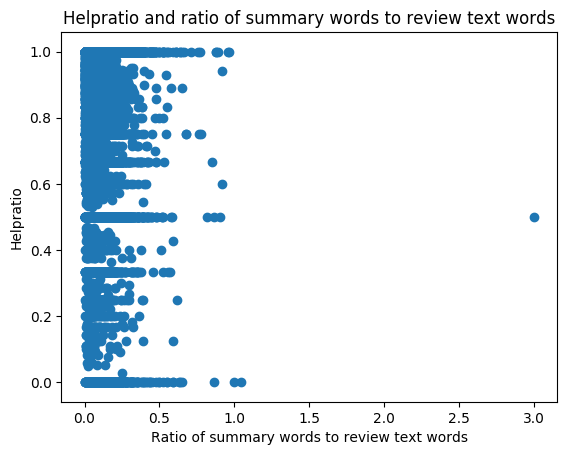

[[ 1.         -0.05560523]
 [-0.05560523  1.        ]]


In [376]:
x = ratiosuWords
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and ratio of summary words to review text words')
ax.set_xlabel('Ratio of summary words to review text words')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

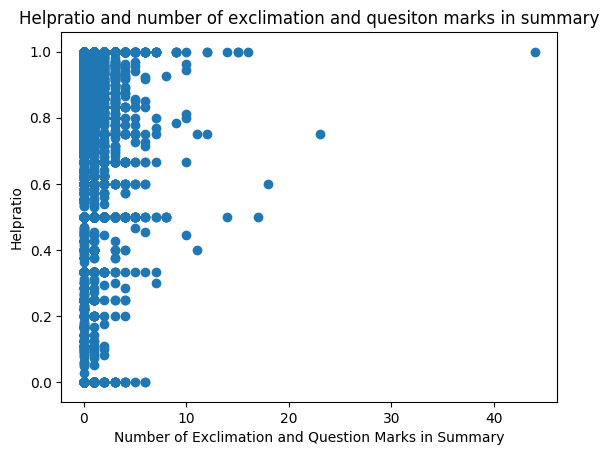

[[ 1.          0.02723845]
 [ 0.02723845  1.        ]]


In [377]:
x = suexcqueMarks
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and number of exclimation and quesiton marks in summary')
ax.set_xlabel('Number of Exclimation and Question Marks in Summary')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

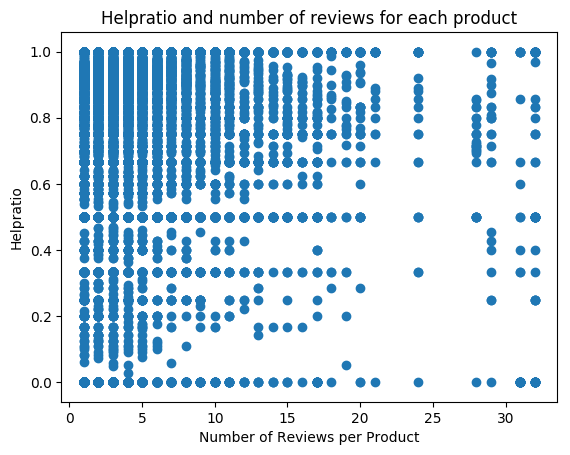

[[ 1.         -0.06277088]
 [-0.06277088  1.        ]]


In [378]:
x = numreviewPro
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and number of reviews for each product')
ax.set_xlabel('Number of Reviews per Product')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

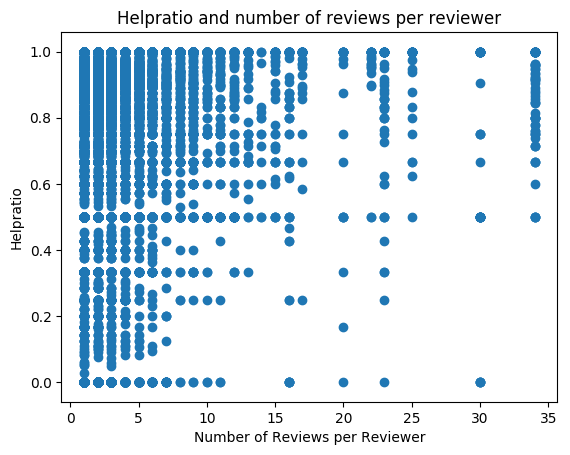

[[ 1.          0.03134622]
 [ 0.03134622  1.        ]]


In [379]:
x = numReviews
y = Helpratio
fig, ax = plt.subplots()
ax.scatter(x,y)
ax.set_title('Helpratio and number of reviews per reviewer')
ax.set_xlabel('Number of Reviews per Reviewer')
ax.set_ylabel("Helpratio")
plt.show()
print (np.corrcoef(x,Helpratio))

## Classify test data

In [115]:
from sklearn.model_selection import train_test_split
X = filter_dfpru3
y = filter_df['Helpgroup']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)

In [116]:
len(X)

63013

In [117]:
import collections
lab_count1=dict(collections.Counter(y_train))
lab_count = collections.OrderedDict(sorted(lab_count1.items()))
print (lab_count)

OrderedDict([(0, 6388), (1, 44022)])


In [118]:
910/(910+26659)

0.03300808879538612

In [119]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
prediction_log = clf.predict(X_val)
print (mean_absolute_error(y_val, prediction_log))

0.13139728636


In [120]:
j = 0
for i in prediction_log:
    if i == 0:
        j += 1
b = j / (X_val.shape[0])
print (j, b)

0 0.0


In [121]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
prediction_per = clf.predict(X_val)
print (mean_absolute_error(y_val, prediction_per))

0.640879155757


In [122]:
j = 0
for i in prediction_per:
    if i == 0:
        j += 1
b = j / (X_val.shape[0])
print (j, b)

9029 0.7164167261763073


In [123]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
prediction_dec = clf.predict(X_val)
print (mean_absolute_error(y_val, prediction_dec))

0.131873363485


In [124]:
j = 0
for i in prediction_dec:
    if i == 0:
        j += 1
b = j / (X_val.shape[0])
print (j, b)

38 0.003015155121796398


In [125]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
prediction_ran = clf.predict(X_val)
print (mean_absolute_error(y_val, prediction_ran))

0.13139728636


In [126]:
j = 0
for i in prediction_ran:
    if i == 0:
        j += 1
b = j / (X_val.shape[0])
print (j, b)

0 0.0


In [127]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
#prediction_test = clf.predict(X_test_counts)
prediction_ada = clf.predict(X_val)
print (mean_absolute_error(y_val, prediction_ada))

0.135443941919


In [128]:
j = 0
for i in prediction_ada:
    if i == 0:
        j += 1
b = j / (X_val.shape[0])
print (j, b)

237 0.01880504641751964


### Use RandomFroest model to classify test data into 1 or 0 class

In [129]:
clf = RandomForestClassifier(max_depth=5)
clf.fit(X_train, y_train, sample_weight=np.array([1 if r==0 else 1 for r in y_train]))
prediction_ran = clf.predict(test_df)

In [130]:
test_df_raw['Helpgroup'] = list(prediction_ran)

In [131]:
test_df_raw.head(1)

,categoryID,categories,itemID,reviewerID,rating,reviewText,reviewHash,reviewTime,summary,unixReviewTime,...,ratiopunChar,reviewCwords,ratioCwords,summaryCwords,suratioCwords,reexcqueMarks,suexcqueMarks,numreviewPro,numReviews,Helpgroup
0,0,"[[Sports & Outdoors, Other Sports, Dance, Clot...",I520932398,U816789534,3.0,I ordered according to the size chart but it's...,R157684793,"07 15, 2011",Too small,0.0,...,0.043103,1,0.037037,0,0.0,0,0,2,1,1


In [132]:
j = 0
for i in prediction_ada:
    if i != 1:
        j += 1
b = j / (test_df.shape[0])
print (j, b)

237 0.016928571428571428


## Predict test data Helpratio

### According to the class sperate dataframe into two dataframes

In [133]:
def replace(group):
    mean, std = group.mean(), group.std()
    outliers = (group - mean).abs() > 5*std
    group[outliers] = nan        # or "group[~outliers].mean()"
    return group

In [134]:
class0_filter = np.where(filter_dfpru['Helpgroup'] == 0)
class0_filter = list(class0_filter[0])
class0_df = filter_dfpru3.iloc[class0_filter,:]
y0 = filter_dfpru['Helpratio'].iloc[class0_filter]
X0 = class0_df.reset_index(drop=True)
y0 = y0.reset_index(drop=True)

In [135]:
X0_fi = pd.concat([X0, y0], axis = 1)

In [136]:
for i in X0_fi:
    X0_fi[i] = replace(X0_fi[i])

/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [137]:
X0 = X0_fi.dropna()
y0 = X0['Helpratio']
X0 = X0.drop(['Helpratio'], axis = 1)

In [138]:
class1_filter = np.where(filter_dfpru['Helpgroup'] == 1)
class1_filter = list(class1_filter[0])
class1_df = filter_dfpru3.iloc[class1_filter,:]
y1 = filter_dfpru['Helpratio'].iloc[class1_filter]
X1 = class1_df.reset_index(drop=True)
y1 = y1.reset_index(drop=True)

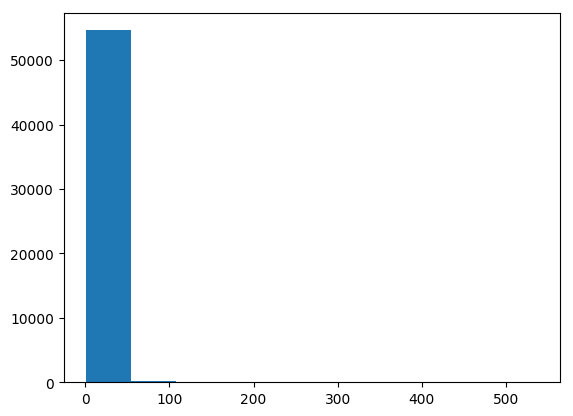

In [139]:
a = list(X1['outOf'])
bins = 10
plt.hist(a, bins, histtype='bar')
plt.show()

In [140]:
#sperate X1 into two groups
X1['Helpratio'] = y1
class11_df = X1.loc[X1.outOf >= 300]
class12_df = X1.loc[(X1.outOf < 300) & (X1.outOf >= 200)]
class13_df = X1.loc[(X1.outOf < 200) & (X1.outOf >= 100)]
class14_df = X1.loc[(X1.outOf < 100) & (X1.outOf >= 10)]
class15_df = X1.loc[(X1.outOf < 10) & (X1.outOf >= 2)]
class16_df = X1.loc[X1.outOf < 2]
X11 = class11_df.reset_index(drop=True)
X12 = class12_df.reset_index(drop=True)
X13 = class13_df.reset_index(drop=True)
X14 = class14_df.reset_index(drop=True)
X15 = class15_df.reset_index(drop=True)
X16 = class16_df.reset_index(drop=True)

In [141]:
X11.shape, X12.shape,X13.shape,X14.shape,X15.shape,X16.shape

((13, 10), (16, 10), (73, 10), (5159, 10), (28069, 10), (21639, 10))

In [142]:
for i in X11:
    X11[i] = replace(X11[i])
for i in X12:
    X12[i] = replace(X12[i])
for i in X13:
    X13[i] = replace(X13[i])
for i in X14:
    X14[i] = replace(X14[i])
for i in X15:
    X15[i] = replace(X15[i])
for i in X16:
    X16[i] = replace(X16[i])

/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [143]:
X11 = X11.dropna()
X12 = X12.dropna()
X13 = X13.dropna()
X14 = X14.dropna()
X15 = X15.dropna()
X16 = X16.dropna()

In [144]:
y11 = X11['Helpratio']
y12 = X12['Helpratio']
y13 = X13['Helpratio']
y14 = X14['Helpratio']
y15 = X15['Helpratio']
y16 = X16['Helpratio']
X11 = X11.drop(['Helpratio'], axis = 1)
X12 = X12.drop(['Helpratio'], axis = 1)
X13 = X13.drop(['Helpratio'], axis = 1)
X14 = X14.drop(['Helpratio'], axis = 1)
X15 = X15.drop(['Helpratio'], axis = 1)
X16 = X16.drop(['Helpratio'], axis = 1)

In [145]:
from sklearn.model_selection import train_test_split
X0_train, X0_val, y0_train, y0_val = train_test_split(X0, y0, test_size=.2, random_state=42)
X11_train, X11_val, y11_train, y11_val = train_test_split(X11, y11, test_size=.2, random_state=42)
X12_train, X12_val, y12_train, y12_val = train_test_split(X12, y12, test_size=.2, random_state=42)
X13_train, X13_val, y13_train, y13_val = train_test_split(X13, y13, test_size=.2, random_state=42)
X14_train, X14_val, y14_train, y14_val = train_test_split(X14, y14, test_size=.2, random_state=42)
X15_train, X15_val, y15_train, y15_val = train_test_split(X15, y15, test_size=.2, random_state=42)
X16_train, X16_val, y16_train, y16_val = train_test_split(X16, y16, test_size=.2, random_state=42)

In [146]:
X0_train_norm = X0_train/ X0_train.max()
X0_val_norm = X0_val / X0_val.max()
X11_train_norm = X11_train / X11_train.max()
X11_val_norm = X11_val/ X11_val.max()
X12_train_norm = X12_train / X12_train.max()
X12_val_norm = X12_val / X12_val.max()
X13_train_norm = X13_train / X13_train.max()
X13_val_norm = X13_val / X13_val.max()
X14_train_norm = X14_train / X14_train.max()
X14_val_norm = X14_val / X14_val.max()
X15_train_norm = X15_train / X15_train.max()
X15_val_norm = X15_val / X15_val.max()
X16_train_norm = X16_train / X16_train.max()
X16_val_norm = X16_val / X16_val.max()

In [147]:
import numpy as np
X0array = np.c_[X0_train.as_matrix(columns=None), np.ones(len(X0_train))]
y0array = y0_train.as_matrix(columns=None)
theta0,residuals0,rank0,s0 = np.linalg.lstsq(X0array, y0array)
X0valarray = np.c_[X0_val.as_matrix(columns=None), np.ones(len(X0_val))]
predictions0 = np.dot(X0valarray, theta0)
print (mean_absolute_error(y0_val, predictions0))

0.0


In [148]:
X11array = np.c_[X11_train.as_matrix(columns=None), np.ones(len(X11_train))]
y11array = y11_train.as_matrix(columns=None)
theta11,residuals11,rank11,s11 = np.linalg.lstsq(X11array, y11array)
X11valarray = np.c_[X11_val.as_matrix(columns=None), np.ones(len(X11_val))]
predictions11 = np.dot(X11valarray, theta11)
print (mean_absolute_error(y11_val, predictions11))

0.129995539118


In [149]:
X12array = np.c_[X12_train.as_matrix(columns=None), np.ones(len(X12_train))]
y12array = y12_train.as_matrix(columns=None)
theta12,residuals12,rank12,s12 = np.linalg.lstsq(X12array, y12array)
X12valarray = np.c_[X12_val.as_matrix(columns=None), np.ones(len(X12_val))]
predictions12 = np.dot(X12valarray, theta12)
print (mean_absolute_error(y12_val, predictions12))

0.226432430781


In [150]:
X13array = np.c_[X13_train.as_matrix(columns=None), np.ones(len(X13_train))]
y13array = y13_train.as_matrix(columns=None)
theta13,residuals13,rank13,s13 = np.linalg.lstsq(X13array, y13array)
X13valarray = np.c_[X13_val.as_matrix(columns=None), np.ones(len(X13_val))]
predictions13 = np.dot(X13valarray, theta13)
print (mean_absolute_error(y13_val, predictions13))

0.044689376475


In [151]:
X14array = np.c_[X14_train.as_matrix(columns=None), np.ones(len(X14_train))]
y14array = y14_train.as_matrix(columns=None)
theta14,residuals14,rank14,s14 = np.linalg.lstsq(X14array, y14array)
X14valarray = np.c_[X14_val.as_matrix(columns=None), np.ones(len(X14_val))]
predictions14 = np.dot(X14valarray, theta14)
print (mean_absolute_error(y14_val, predictions14))

0.0709553559344


In [152]:
X15array = np.c_[X15_train.as_matrix(columns=None), np.ones(len(X15_train))]
y15array = y15_train.as_matrix(columns=None)
theta15,residuals15,rank15,s15 = np.linalg.lstsq(X15array, y15array)
X15valarray = np.c_[X15_val.as_matrix(columns=None), np.ones(len(X15_val))]
predictions15 = np.dot(X15valarray, theta15)
print (mean_absolute_error(y15_val, predictions15))

0.188786668642


In [153]:
X16array = np.c_[X16_train.as_matrix(columns=None), np.ones(len(X16_train))]
y16array = y16_train.as_matrix(columns=None)
theta16,residuals16,rank16,s16 = np.linalg.lstsq(X16array, y16array)
X16valarray = np.c_[X16_val.as_matrix(columns=None), np.ones(len(X16_val))]
predictions16 = np.dot(X16valarray, theta16)
print (mean_absolute_error(y16_val, predictions16))

3.44019915818e-13


In [154]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr0 = svr_rbf.fit(X0_train_norm, y0_train).predict(X0_val_norm)
print (mean_absolute_error(y0_val, prediction_svr0))

0.0


In [155]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr11 = svr_rbf.fit(X11_train_norm, y11_train).predict(X11_val_norm)
print (mean_absolute_error(y11_val, prediction_svr11))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [156]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr12 = svr_rbf.fit(X12_train_norm, y12_train).predict(X12_val_norm)
print (mean_absolute_error(y12_val, prediction_svr12))

0.0482282817161


In [157]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr13 = svr_rbf.fit(X13_train_norm, y13_train).predict(X13_val_norm)
print (mean_absolute_error(y13_val, prediction_svr13))

0.0812692342387


In [158]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr14 = svr_rbf.fit(X14_train_norm, y14_train).predict(X14_val_norm)
print (mean_absolute_error(y14_val, prediction_svr14))

0.0775774837248


In [159]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr15 = svr_rbf.fit(X15_train_norm, y15_train).predict(X15_val_norm)
print (mean_absolute_error(y15_val, prediction_svr15))

0.182454681581


In [160]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
prediction_svr16 = svr_rbf.fit(X16_train_norm, y16_train).predict(X16_val_norm)
print (mean_absolute_error(y16_val, prediction_svr16))

0.0


### Using linear algorithm to predict Helpratio of test data

In [161]:
a = list(test_df_raw['Helpgroup'])
test_df['Helpgroup'] = a

/Users/xiasong/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [162]:
test0_df = test_df.loc[test_df.Helpgroup==0]
test11_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf >= 300)]
test12_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf >=200) & (test_df.outOf < 300)]
test13_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf >=100) & (test_df.outOf < 200)]
test14_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf >=10) & (test_df.outOf < 100)]
test15_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf >=2) & (test_df.outOf < 10)]
test16_df = test_df.loc[(test_df.Helpgroup == 1) & (test_df.outOf < 2)]

In [163]:
test0_df = test0_df.drop(['Helpgroup'], axis = 1)
test11_df = test11_df.drop(['Helpgroup'], axis = 1)
test12_df = test12_df.drop(['Helpgroup'], axis = 1)
test13_df = test13_df.drop(['Helpgroup'], axis = 1)
test14_df = test14_df.drop(['Helpgroup'], axis = 1)
test15_df = test15_df.drop(['Helpgroup'], axis = 1)
test16_df = test16_df.drop(['Helpgroup'], axis = 1)

In [164]:
test14_df.shape

(360, 9)

In [165]:
test0_df.shape

(6, 9)

In [166]:
X0.shape

(7642, 9)

In [167]:
import numpy as np
X0array = np.c_[X0.as_matrix(columns=None), np.ones(len(X0))]
y0array = y0.as_matrix(columns=None)
theta0,residuals0,rank0,s0 = np.linalg.lstsq(X0array, y0array)
X0testarray = np.c_[test0_df.as_matrix(columns=None), np.ones(len(test0_df))]
predictions0 = np.dot(X0testarray, theta0)

In [168]:
linpredictions0 = list(predictions0)
outOf = list(test0_df['outOf'])
linpredictions0 = [a*b for a,b in zip(linpredictions0, outOf)]
linpred0 = []
for i in linpredictions0:
    linpred0.append(round(i))
test0_df['predictions'] = linpred0

In [169]:
X11array = np.c_[X11.as_matrix(columns=None), np.ones(len(X11))]
y11array = y11.as_matrix(columns=None)
theta11,residuals11,rank11,s11 = np.linalg.lstsq(X11array, y11array)
X11testarray = np.c_[test11_df.as_matrix(columns=None), np.ones(len(test11_df))]
predictions11 = np.dot(X11testarray, theta11)

In [170]:
linpredictions11 = list(predictions11)
outOf = list(test11_df['outOf'])
linpredictions11 = [a*b for a,b in zip(linpredictions11, outOf)]
linpred11 = []
for i in linpredictions11:
    linpred11.append(round(i))
test11_df['predictions'] = linpred11

In [171]:
X12array = np.c_[X12.as_matrix(columns=None), np.ones(len(X12))]
y12array = y12.as_matrix(columns=None)
theta12,residuals12,rank12,s12 = np.linalg.lstsq(X12array, y12array)
X12testarray = np.c_[test12_df.as_matrix(columns=None), np.ones(len(test12_df))]
predictions12 = np.dot(X12testarray, theta12)

In [172]:
linpredictions12 = list(predictions12)
outOf = list(test12_df['outOf'])
linpredictions12 = [a*b for a,b in zip(linpredictions12, outOf)]
linpred12 = []
for i in linpredictions12:
    linpred12.append(round(i))
test12_df['predictions'] = linpred12

In [173]:
X13array = np.c_[X13.as_matrix(columns=None), np.ones(len(X13))]
y13array = y13.as_matrix(columns=None)
theta13,residuals13,rank13,s13 = np.linalg.lstsq(X13array, y13array)
X13testarray = np.c_[test13_df.as_matrix(columns=None), np.ones(len(test13_df))]
predictions13 = np.dot(X13testarray, theta13)

In [174]:
linpredictions13 = list(predictions13)
outOf = list(test13_df['outOf'])
linpredictions13 = [a*b for a,b in zip(linpredictions13, outOf)]
linpred13 = []
for i in linpredictions13:
    linpred13.append(round(i))
test13_df['predictions'] = linpred13

In [175]:
test14_df.shape

(360, 9)

In [176]:
X14array = np.c_[X14.as_matrix(columns=None), np.ones(len(X14))]
y14array = y14.as_matrix(columns=None)
theta14,residuals14,rank14,s14 = np.linalg.lstsq(X14array, y14array)
X14testarray = np.c_[test14_df.as_matrix(columns=None), np.ones(len(test14_df))]
predictions14 = np.dot(X14testarray, theta14)

In [177]:
linpredictions14 = list(predictions14)
outOf = list(test14_df['outOf'])
linpredictions14 = [a*b for a,b in zip(linpredictions14, outOf)]
linpred14 = []
for i in linpredictions14:
    linpred14.append(round(i))
test14_df['predictions'] = linpred14

In [178]:
X15array = np.c_[X15.as_matrix(columns=None), np.ones(len(X15))]
y15array = y15.as_matrix(columns=None)
theta15,residuals15,rank15,s15 = np.linalg.lstsq(X15array, y15array)
X15testarray = np.c_[test15_df.as_matrix(columns=None), np.ones(len(test15_df))]
predictions15 = np.dot(X15testarray, theta15)

In [179]:
linpredictions15 = list(predictions15)
outOf = list(test15_df['outOf'])
linpredictions15 = [a*b for a,b in zip(linpredictions15, outOf)]
linpred15 = []
for i in linpredictions15:
    linpred15.append(round(i))
test15_df['predictions'] = linpred15

In [180]:
X16array = np.c_[X16.as_matrix(columns=None), np.ones(len(X16))]
y16array = y16.as_matrix(columns=None)
theta16,residuals16,rank16,s16 = np.linalg.lstsq(X16array, y16array)
X16testarray = np.c_[test16_df.as_matrix(columns=None), np.ones(len(test16_df))]
predictions16 = np.dot(X16testarray, theta16)

In [181]:
linpredictions16 = list(predictions16)
outOf = list(test16_df['outOf'])
linpredictions16 = [a*b for a,b in zip(linpredictions16, outOf)]
linpred16 = []
for i in linpredictions16:
    linpred16.append(round(i))
test16_df['predictions'] = linpred16

In [182]:
test0_df.shape

(6, 10)

In [183]:
test_pre_df = pd.concat([test0_df, test11_df, test12_df, test13_df,test14_df,test15_df,test16_df], axis = 0)
test_pre_df.sort_index(inplace=True)

In [184]:
test_df_raw['Predictions'] = test_pre_df['predictions']
predictions = open("predictions_Helpful.txt", 'w')
a = test_df_raw['reviewerID']
b = test_df_raw['itemID']
c = test_df_raw['outOf']
d = test_df_raw['Predictions']
for i in range(len(a)):
    e = a[i]
    f = b[i]
    g = c[i]
    h = d[i]
    predictions.write(e + '-' + f + '-' + str(g) + ',' + str(h) + '\n')
predictions.close()